In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

From Okounkova+21 [2101.11153]

$$
 \frac{1 + \cos \iota_\mathrm{gw}}{1 - \cos \iota_\mathrm{gw}} = \frac{e^{-d_C \kappa/2}(1 + \cos \iota_\mathrm{true})}{e^{d_C \kappa/2}(1 - \cos \iota_\mathrm{true})}
    $$
    
$$
c_g \equiv \cos \iota_\mathrm{gw}, \, c_t \equiv \cos \iota_\mathrm{true}
$$

$$
\kappa = \frac{1}{d_C} \left\| \log \left ( \frac{(1 + c_g)(1 - c_t)}{(1 - c_g)(1 + c_t)}   \right) \right\|
$$

In [2]:
def kappa(cos_iota_gw, cos_iota_tr, d_c = 0.2):
    """ Compute kappa, the birefringence opacity parameter as a function of detected inclinations and distance
        cos_iota_gw: cos inclination reported by GW detector
        cos_iota_tr: true cos inclination, or GRB inclination if we trust it
        d_c: comoving distance to source, in GpC """
    return np.abs(np.log( \
                         ((1 + cos_iota_gw)*(1 - cos_iota_tr)) / \
                         ((1 - cos_iota_gw)*(1 + cos_iota_tr)) \
                        ))/ d_c

In [3]:
def plot_kappa_contour(d_c):
    
    """ plot a contour plot for kappa constraints given a comoving distance
        d_c: comoving distance in gpc"""
    
    cos_iota_gw = np.linspace(-1, 1, 50)
    cos_iota_tr = np.linspace(-1, 1, 50)

    X, Y  = np.meshgrid(cos_iota_gw, cos_iota_tr)
    Z = kappa(X, Y, d_c = d_c)

    plt.figure(figsize = (9,7))
    contours = plt.contourf(X, Y, Z, 25, cmap='PuBuGn')
    cbar = plt.colorbar()
    cbar.set_label(r'$\kappa [\mathrm{Gpc}^{-1}]$ at $d_C = %.1f$ GpC' % d_c)

    CS = gwtc2_constraint = plt.contour(X, Y,Z,levels = [0.74], colors=('k'), linewidths=(2.0))
    CS.collections[0].set_label('GWTC-2')

    plt.plot([-1, 1], [-1, 1], '--', color = 'red', label = 'No birefringence')
    plt.grid()
    plt.legend(frameon = True)
    plt.xlabel(r'$\cos \,\iota_\mathrm{gw}$')
    plt.ylabel(r'$\cos \, \iota_\mathrm{true}$')
    plt.show()

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


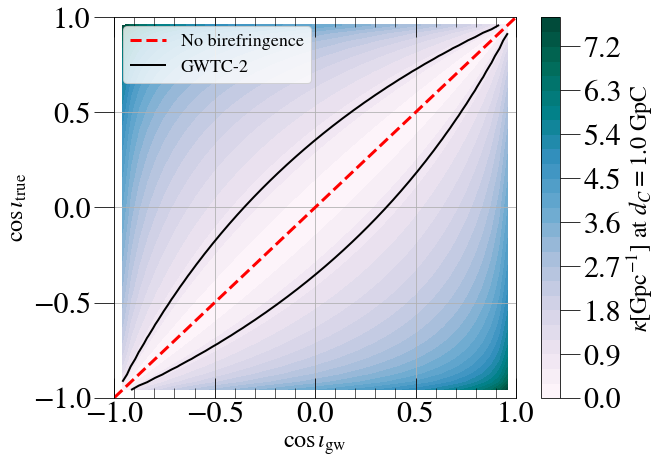

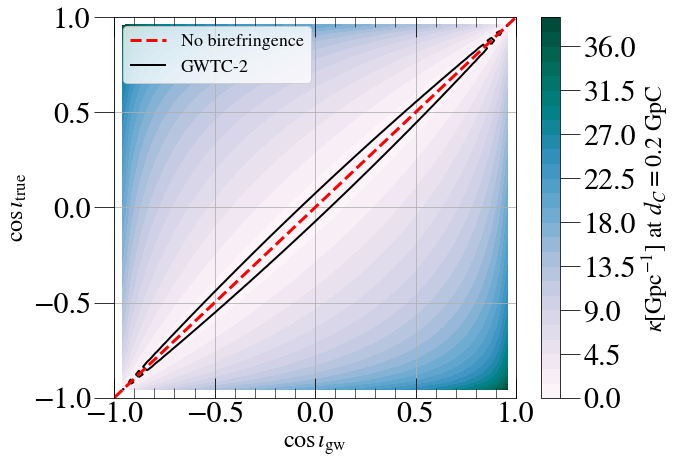

In [4]:
plot_kappa_contour(1.0)
plot_kappa_contour(0.2)